In [1]:
import re
import pandas as pd

In [2]:
# f = open('WhatsApp Chat with Feedbox- DGtal Mrktng & IT Community.txt','r',encoding='utf-8')

f = open('WhatsApp Chat with Sweet Cousins ♥️♥️.txt','r',encoding='utf-8')

# f = open('WhatsAppChatwithKOHAGANG.txt','r',encoding='utf-8')







In [3]:
data = f.read()

In [4]:
print(data)

11/10/24, 10:22 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/11/24, 6:51 PM - NANU masi: <Media omitted>
11/12/24, 8:19 AM - 🧿💕Mumma💕🧿: Happy anniversary dear Anu and Saurabh 🍰🍫🎉💐✨🎊🥰
11/12/24, 9:03 AM - Anu Maami: Thank you Renu di.❤️❤️
11/12/24, 9:05 AM - Surabhi Di 🥰: Happy anniversary saurabh bhaiya and anu bhabhi 🙂🙂may almighty bless you always . 


Lots of love for Vaanya 😘😘enjoy your trip
11/12/24, 9:06 AM - NANU masi: <Media omitted>
11/12/24, 9:07 AM - NANU masi: For dearest Anu and Saurabh
11/12/24, 9:08 AM - Anu Maami: Thank you Surabhi🙂
11/12/24, 9:08 AM - Anu Maami: Thank you Mummy ji🙂
11/12/24, 9:09 AM - Anu Maami: ❤️❤️❤️
11/12/24, 9:56 AM - +91 70002 81157: Happy anniversary Saurabh and Anu bhabhi 🎂🍰🍫🎉💐🎊
11/12/24, 10:25 AM - Yashika Makhija: Happy anniversary saurabh bhaia and anu bhabhi stay blessed always 🧿☺️☺️😍😍🍕🍟🍔🌭🌮🧆🥙🥮🥮
11/12/24, 2:53 PM - +91 99074 33570: Happy anni

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?[APap][Mm]\s-\s'

In [7]:
message = re.split(pattern,data)[1:]
len(message)

369

In [8]:
dates = re.findall(pattern,data)

len(dates)

369

In [9]:
df = pd.DataFrame({'user_message': message, 'message_date': dates})

df['message_date'] = df['message_date'].str.replace('\u202f', ' ')

#convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p - ', errors='coerce', dayfirst=True)

df.rename(columns={'message_date':'date'}, inplace=True)


In [10]:
df

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2024-10-11 22:22:00
1,NANU masi: <Media omitted>\n,2024-11-11 18:51:00
2,🧿💕Mumma💕🧿: Happy anniversary dear Anu and Saur...,2024-12-11 08:19:00
3,Anu Maami: Thank you Renu di.❤️❤️\n,2024-12-11 09:03:00
4,Surabhi Di 🥰: Happy anniversary saurabh bhaiya...,2024-12-11 09:05:00
...,...,...
364,Anu Maami: Kaise ho aap and Mama ji?🙂\n,NaT
365,+91 70002 81157: Happy birthday Anu Bhabhi 🎂🍰🎉...,NaT
366,Anu Maami: Thank you Parul didi. How are you a...,NaT
367,+91 83055 55174: Happy birthday Anu Bhabhi🎂\n,NaT


In [11]:
# Initialize lists
users = []
messages = []

# Process messages
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)  # Split on first colon followed by space
    if len(entry) > 2:  # Valid user-message format
        users.append(entry[1].strip())
        messages.append(entry[2].strip())
    else:  # Group notification or no user
        users.append('group_notification')
        messages.append(message.strip())

# Add new columns to DataFrame
df['user'] = users
df['message'] = messages

# Drop the original column
df.drop(columns=['user_message'], inplace=True)

# Print the result
# print(df.head())

In [12]:
df

,date,user,message
0,2024-10-11 22:22:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-11-11 18:51:00,NANU masi,<Media omitted>
2,2024-12-11 08:19:00,🧿💕Mumma💕🧿,Happy anniversary dear Anu and Saurabh 🍰🍫🎉💐✨🎊🥰
3,2024-12-11 09:03:00,Anu Maami,Thank you Renu di.❤️❤️
4,2024-12-11 09:05:00,Surabhi Di 🥰,Happy anniversary saurabh bhaiya and anu bhabh...
...,...,...,...
364,NaT,Anu Maami,Kaise ho aap and Mama ji?🙂
365,NaT,+91 70002 81157,Happy birthday Anu Bhabhi 🎂🍰🎉🍫💐🎊
366,NaT,Anu Maami,Thank you Parul didi. How are you all? ❣️
367,NaT,+91 83055 55174,Happy birthday Anu Bhabhi🎂


In [13]:
df

,date,user,message
0,2024-10-11 22:22:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2024-11-11 18:51:00,NANU masi,<Media omitted>
2,2024-12-11 08:19:00,🧿💕Mumma💕🧿,Happy anniversary dear Anu and Saurabh 🍰🍫🎉💐✨🎊🥰
3,2024-12-11 09:03:00,Anu Maami,Thank you Renu di.❤️❤️
4,2024-12-11 09:05:00,Surabhi Di 🥰,Happy anniversary saurabh bhaiya and anu bhabh...
...,...,...,...
364,NaT,Anu Maami,Kaise ho aap and Mama ji?🙂
365,NaT,+91 70002 81157,Happy birthday Anu Bhabhi 🎂🍰🎉🍫💐🎊
366,NaT,Anu Maami,Thank you Parul didi. How are you all? ❣️
367,NaT,+91 83055 55174,Happy birthday Anu Bhabhi🎂


In [14]:
df['year'] = df['date'].dt.year


In [15]:
df['month'] = df['date'].dt.month_name()

In [16]:
df['day'] = df['date'].dt.day

In [17]:
df['hour'] = df['date'].dt.hour

In [18]:
df['minute'] = df['date'].dt.minute

In [19]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-10-11 22:22:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024.0,October,11.0,22.0,22.0
1,2024-11-11 18:51:00,NANU masi,<Media omitted>,2024.0,November,11.0,18.0,51.0
2,2024-12-11 08:19:00,🧿💕Mumma💕🧿,Happy anniversary dear Anu and Saurabh 🍰🍫🎉💐✨🎊🥰,2024.0,December,11.0,8.0,19.0
3,2024-12-11 09:03:00,Anu Maami,Thank you Renu di.❤️❤️,2024.0,December,11.0,9.0,3.0
4,2024-12-11 09:05:00,Surabhi Di 🥰,Happy anniversary saurabh bhaiya and anu bhabh...,2024.0,December,11.0,9.0,5.0


In [20]:
words = []

for message in df['message']:
    words.extend(message.split())

In [21]:
len(words)

# words

3562

In [22]:
df[df['message'] == '<Media omitted>'].shape[0]

106

In [23]:
!pip install URLExtract

In [24]:
from urlextract import URLExtract

extractor = URLExtract()

# urls = extractor.find_urls("")

In [25]:
y = [];
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [26]:
y

['https://thebetterindia.com/383947/la-nina-effect-explained-climate-impact-india-winter/',
 'https://habit.yoga/Sneh_26vbb']

In [27]:
len(y)

2

In [28]:
df

,date,user,message,year,month,day,hour,minute
0,2024-10-11 22:22:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024.0,October,11.0,22.0,22.0
1,2024-11-11 18:51:00,NANU masi,<Media omitted>,2024.0,November,11.0,18.0,51.0
2,2024-12-11 08:19:00,🧿💕Mumma💕🧿,Happy anniversary dear Anu and Saurabh 🍰🍫🎉💐✨🎊🥰,2024.0,December,11.0,8.0,19.0
3,2024-12-11 09:03:00,Anu Maami,Thank you Renu di.❤️❤️,2024.0,December,11.0,9.0,3.0
4,2024-12-11 09:05:00,Surabhi Di 🥰,Happy anniversary saurabh bhaiya and anu bhabh...,2024.0,December,11.0,9.0,5.0
...,...,...,...,...,...,...,...,...
364,NaT,Anu Maami,Kaise ho aap and Mama ji?🙂,NaN,NaN,NaN,NaN,NaN
365,NaT,+91 70002 81157,Happy birthday Anu Bhabhi 🎂🍰🎉🍫💐🎊,NaN,NaN,NaN,NaN,NaN
366,NaT,Anu Maami,Thank you Parul didi. How are you all? ❣️,NaN,NaN,NaN,NaN,NaN
367,NaT,+91 83055 55174,Happy birthday Anu Bhabhi🎂,NaN,NaN,NaN,NaN,NaN


In [29]:
x = df['user'].value_counts().head()

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count = x.values

C:\Users\PREET\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


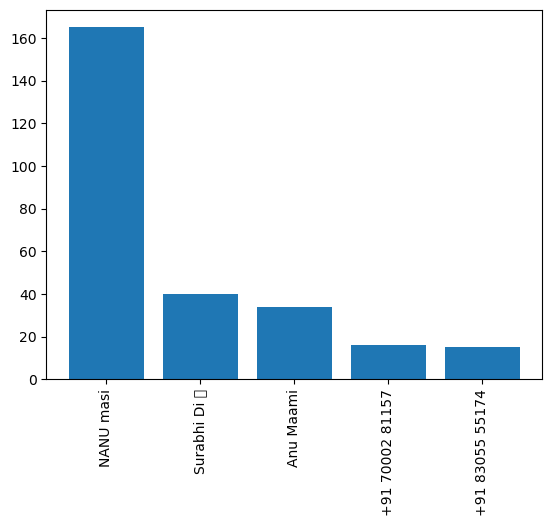

In [32]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name', 'count':"percent"})

,name,percent
0,NANU masi,44.72
1,Surabhi Di 🥰,10.84
2,Anu Maami,9.21
3,+91 70002 81157,4.34
4,+91 83055 55174,4.07
5,+91 79997 57012,3.52
6,Srishti Didi,3.25
7,+91 99221 11672,2.98
8,🧿💕Mumma💕🧿,2.71
9,+91 98961 09703,2.71


In [34]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [35]:
words = []

for message in temp['message']:
    words.extend(message.split())

In [36]:
from collections import Counter

pd.DataFrame(Counter(words).most_common(20))

,0,1
0,and,111
1,<Media,106
2,omitted>,106
3,Happy,103
4,you,69
5,birthday,59
6,अक्षर,46
7,dear,45
8,the,42
9,a,39


In [37]:
!pip install emoji

In [38]:
import emoji

In [39]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [40]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🥰,62
1,🙏,62
2,💐,56
3,🎂,53
4,🎉,52
...,...,...
58,🤩,1
59,👇,1
60,🍥,1
61,🎈,1


In [41]:
# work on message timeline

In [42]:
df['month_num'] = df['date'].dt.month

In [43]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [44]:
timeline

,year,month_num,month,message
0,2024.0,1.0,January,4
1,2024.0,2.0,February,1
2,2024.0,3.0,March,16
3,2024.0,4.0,April,3
4,2024.0,5.0,May,4
5,2024.0,6.0,June,2
6,2024.0,7.0,July,2
7,2024.0,8.0,August,7
8,2024.0,10.0,October,2
9,2024.0,11.0,November,1


In [45]:
# merge year month coloumn

In [46]:
timeline.shape

(18, 4)

In [47]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [48]:
timeline['time'] = time

In [49]:
timeline

,year,month_num,month,message,time
0,2024.0,1.0,January,4,January-2024.0
1,2024.0,2.0,February,1,February-2024.0
2,2024.0,3.0,March,16,March-2024.0
3,2024.0,4.0,April,3,April-2024.0
4,2024.0,5.0,May,4,May-2024.0
5,2024.0,6.0,June,2,June-2024.0
6,2024.0,7.0,July,2,July-2024.0
7,2024.0,8.0,August,7,August-2024.0
8,2024.0,10.0,October,2,October-2024.0
9,2024.0,11.0,November,1,November-2024.0


In [50]:
#plot graph

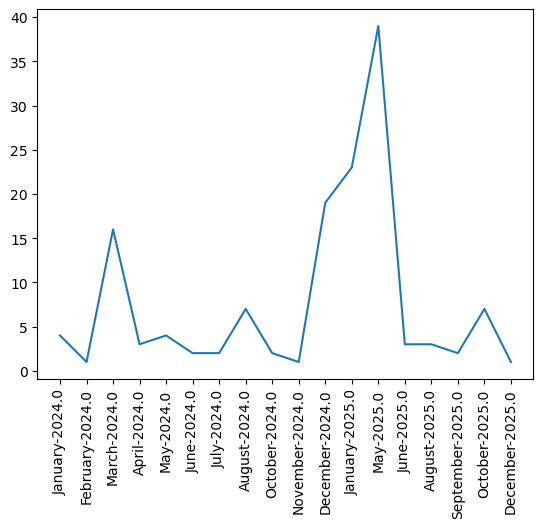

In [51]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [105]:
# daily time line code

In [111]:
df['only_date'] = df['date'].dt.date

In [117]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2024-01-12,4
1,2024-02-12,1
2,2024-03-12,16
3,2024-04-12,3
4,2024-05-12,4
5,2024-06-12,2
6,2024-07-12,2
7,2024-08-12,7
8,2024-10-11,1
9,2024-10-12,1
